<a href="https://colab.research.google.com/github/ashikshafi08/AICrowd_Competition_Files/blob/main/Tensorflow/Rover_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Mar 27 11:02:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Rover Classification 
Someone has mishandled the labeling of two Mars rover projects — Curiosity and Perseverance — we must classify them correctly.

The given dataset contains images of two different rovers i.e. Curiosity and Perseverance of size 265x256 in jpg format. The images in **train.zip** and **val.zip**  have their labels i.e. which rover it is in **train.csv** and **val.csv**. The labels for the images in test.zip needs to be predicted.

### Evaluation Criteria
During evaluation F1 score is used as Primary Score and Accuracy Score as Secondary Score will be used to test the efficiency of the model.





In [ ]:
# Downloading the data and putting them inside a folder
!pip install aicrowd-cli 
API_KEY = ''
!aicrowd login --api-key $API_KEY

     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 163kB 24.1MB/s 
     |████████████████████████████████| 204kB 32.0MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
API Key valid
Saved API Key successfully!


In [ ]:
# Downloading the datasets
!aicrowd dataset download --challenge rover-classification -j 3

sample_submission.csv:   0% 0.00/164k [00:00<?, ?B/s]
sample_submission.csv: 100% 164k/164k [00:00<00:00, 817kB/s]
sample_submission.csv: 100% 164k/164k [00:00<00:00, 816kB/s]
train.csv: 100% 689k/689k [00:00<00:00, 1.97MB/s]
test.zip:   0% 0.00/66.5M [00:00<?, ?B/s]
train.zip:   0% 0.00/266M [00:00<?, ?B/s]

val.csv:   0% 0.00/65.0k [00:00<?, ?B/s]

val.csv: 100% 65.0k/65.0k [00:00<00:00, 585kB/s]


test.zip:  50% 33.6M/66.5M [00:03<00:03, 9.85MB/s]

val.zip: 100% 26.5M/26.5M [00:01<00:00, 13.9MB/s]

train.zip:  13% 33.6M/266M [00:03<00:22, 10.2MB/s]
test.zip: 100% 66.5M/66.5M [00:06<00:00, 10.2MB/s]
test.zip: 100% 66.5M/66.5M [00:06<00:00, 10.4MB/s]
train.zip: 100% 266M/266M [00:18<00:00, 14.3MB/s]


In [ ]:
# Creating folders
!rm -rf data
!mkdir data

!unzip train.zip  -d data/train
!unzip val.zip -d data/val
!unzip test.zip  -d data/test

!mv train.csv data/train.csv
!mv val.csv data/val.csv
!mv sample_submission.csv data/sample_submission.csv

Streaming output truncated to the last 5000 lines.
  inflating: data/test/5499.jpg      
  inflating: data/test/55.jpg        
  inflating: data/test/550.jpg       
  inflating: data/test/5500.jpg      
  inflating: data/test/5501.jpg      
  inflating: data/test/5502.jpg      
  inflating: data/test/5503.jpg      
  inflating: data/test/5504.jpg      
  inflating: data/test/5505.jpg      
  inflating: data/test/5506.jpg      
  inflating: data/test/5507.jpg      
  inflating: data/test/5508.jpg      
  inflating: data/test/5509.jpg      
  inflating: data/test/551.jpg       
  inflating: data/test/5510.jpg      
  inflating: data/test/5511.jpg      
  inflating: data/test/5512.jpg      
  inflating: data/test/5513.jpg      
  inflating: data/test/5514.jpg      
  inflating: data/test/5515.jpg      
  inflating: data/test/5516.jpg      
  inflating: data/test/5517.jpg      
  inflating: data/test/5518.jpg      
  inflating: data/test/5519.jpg      
  inflating: data/test/552.jpg       

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-03-27 11:02:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9304 (9.1K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.09K  --.-KB/s    in 0s      

2021-03-27 11:02:43 (91.3 MB/s) - ‘helper_functions.py’ saved [9304/9304]



In [ ]:
# Importing the needed packages 
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from helper_functions import plot_loss_curves , make_confusion_matrix , compare_historys , walk_through_dir 

In [ ]:
# Looking inside the train directory
walk_through_dir('data/train/')
walk_through_dir('data/test/')
walk_through_dir('data/val/')


There are 0 directories and 40000 images in 'data/train/'.
There are 0 directories and 10000 images in 'data/test/'.
There are 0 directories and 4000 images in 'data/val/'.


In [ ]:
# Let's get our csv files which will help us to label 
train_df = pd.read_csv('data/train.csv')
val_df = pd.read_csv('data/val.csv')

In [ ]:
# Checking what's in the train_df
train_df.head()

,ImageID,label
0,0,curiosity
1,1,curiosity
2,2,curiosity
3,3,perseverance
4,4,curiosity


In [ ]:
# How many unique classe are there? (and great there is not class imbalance)
train_df['label'].value_counts()

perseverance    20048
curiosity       19952
Name: label, dtype: int64

In [ ]:
# Getting the train, test and val dir 
train_dir = 'data/train/'
test_dir = 'data/test/'
val_dir = 'data/val/'

In [ ]:
# Will look how the filenames look like 
import os 
print(os.listdir(train_dir)[:10])

['13794.jpg', '1058.jpg', '37500.jpg', '8855.jpg', '10105.jpg', '23535.jpg', '25702.jpg', '23006.jpg', '2752.jpg', '6572.jpg']


In our dataframe we gotta add the extension `jpg` at the end to download the images. 

In [ ]:
# Creating a function for making the action
def append_ext(fn):
    return f'{fn}.jpg'

# Now applying them 
train_df['ImageID'] = train_df['ImageID'].apply(append_ext)
val_df['ImageID'] = val_df['ImageID'].apply(append_ext)

In [ ]:
# Looking into to make sure how the changes are 
train_df['ImageID'][0]

'0.jpg'

In [ ]:
# Creating Data generator for our data 
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1 / 255.)

In [ ]:
# Now it's time to import our data into the generator 

train_data = train_datagen.flow_from_dataframe(dataframe= train_df , 
                                               directory = train_dir , 
                                               x_col = 'ImageID' , 
                                               y_col = 'label' , 
                                               target_size = (224 , 224) , 
                                               class_mode = 'binary')

val_data = val_datagen.flow_from_dataframe(dataframe = val_df , 
                                           directory = val_dir , 
                                           x_col = 'ImageID' , 
                                           y_col = 'label' , 
                                           target_size = (224 , 224) , 
                                           class_mode = 'binary')

Found 40000 validated image filenames belonging to 2 classes.
Found 4000 validated image filenames belonging to 2 classes.


But here is the tricky part, the data augmentation will run on CPU if I am gonna use `ImageDataGenerator` which will slow up the entire process. By using `image_dataset_from_directory` at further we could create data augmentation as an layer and make the augmentation process run on GPU. 

Ima try If I can do that by using `ImageDataGenerator`, still not sure how it's gonna go. Experiment! 

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation_layer = tf.keras.Sequential([
  preprocessing.RandomWidth(0.2), 
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomFlip() , 
  preprocessing.RandomHeight(0.2)
])

### Getting know the data

We did everything so far, but how does our data looks like? We know it's image of a rover but for a guy like me I don't know how does a curiousity rover looks like. 

Let's visualize some of the data from our datagenerator and get to know our data better. 

In [ ]:
train_data.class_indices 

{'curiosity': 0, 'perseverance': 1}

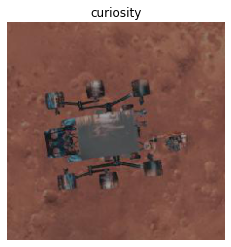

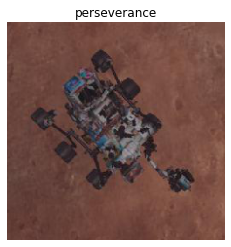

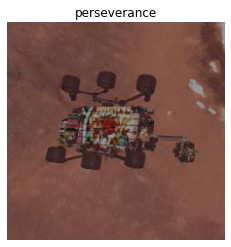

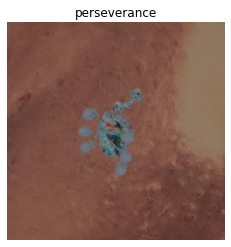

In [ ]:
x , y  = train_data.next()
for i in range(0, 4):
  image = x[i]
  label = y[i]
  plt.axis(False)
  # print(label) --> for checking whether it's plotting right ones
  if label == 1.0:
    label = 'perseverance'
  else:
    label = 'curiosity'
  plt.title(label)
  plt.imshow(image)
  plt.show()

Let's build a baseline and see how it goes! Will build: 
- A model which has no data augmentation, just from a ImageDataGenerator with Transfer Learning (EfficientNetB0) and run for few epochs. 
- Same as above but use mixed precision.
- A experimentation model which does have augmentation like a layer, but unlike generator gotta add this inside the model to make it run on GPU. 
- If the above doesn't work, gotta add augmentation in the Datagenerator, and train a model.

### Model 1 

A model which has no data augmentation, just from a ImageDataGenerator with Transfer Learning (EfficientNetB0) and run for few epochs.

In [ ]:
# Creating a model checkpoint for our model_1 
checkpoint_path_model_1 = 'checkpoints/model_1_checkpoint'
checkpoint_callback_model_1 = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_model_1 , 
                                                                 monitor = 'val_accuracy' , 
                                                                 save_best_only = False , 
                                                                 save_weights_only = True , 
                                                                 verbose = 1)

In [ ]:
# Now into modelling
# Create input shapes 
input_shape = (224 , 224, 3)

# Creating the base model at first (EfficientNetB0)
base_model = tf.keras.applications.EfficientNetB0(include_top= False)
base_model.trainable = False # Freezing all the layers 

# Creating our input layer 
inputs = tf.keras.layers.Input(shape= input_shape , name = 'input_layer_1')
x = base_model(inputs , training = False) # set base model to inference only 

# Layer to condense the tensors out from base model 
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# Output layer 
outputs = tf.keras.layers.Dense(1 , activation='sigmoid' , name = 'output_layer')(x)
# Packing into a model 
model_1 = tf.keras.Model(inputs , outputs)

# Getting the whole summary
model_1.summary()

16711680/16705208 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer_1 (InputLayer)   [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 1281      
Total params: 4,050,852
Trainable params: 1,281
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
# Tensorflow addons for f1-score 
!pip install tensorflow_addons
import tensorflow_addons as tfa

f1_score = tfa.metrics.F1Score(average='macro' , num_classes= 1)

     |████████████████████████████████| 706kB 17.9MB/s 


In [ ]:
# Compile the model 
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy' , f1_score])

In [ ]:
# Training a feature extraction model 
history_feature_model_1 = model_1.fit(train_data , 
                                      epochs = 5 , 
                                      validation_data = val_data, 
                                      validation_steps = int(0.25 * (len(val_data))) , 
                                      callbacks = [checkpoint_callback_model_1])

Epoch 1/5
1250/1250 [==============================] - 138s 81ms/step - loss: 0.6946 - accuracy: 0.5013 - f1_score: 0.6677 - val_loss: 0.6949 - val_accuracy: 0.4960 - val_f1_score: 0.6702

Epoch 00001: saving model to checkpoints/model_1_checkpoint
Epoch 2/5
1250/1250 [==============================] - 98s 78ms/step - loss: 0.6947 - accuracy: 0.4981 - f1_score: 0.6675 - val_loss: 0.6944 - val_accuracy: 0.4849 - val_f1_score: 0.6531

Epoch 00002: saving model to checkpoints/model_1_checkpoint
Epoch 3/5
1250/1250 [==============================] - 96s 77ms/step - loss: 0.6949 - accuracy: 0.5020 - f1_score: 0.6703 - val_loss: 0.6927 - val_accuracy: 0.5353 - val_f1_score: 0.6973

Epoch 00003: saving model to checkpoints/model_1_checkpoint
Epoch 4/5
1250/1250 [==============================] - 96s 77ms/step - loss: 0.6945 - accuracy: 0.5006 - f1_score: 0.6663 - val_loss: 0.6946 - val_accuracy: 0.5030 - val_f1_score: 0.6693

Epoch 00004: saving model to checkpoints/model_1_checkpoint
Epoch 5

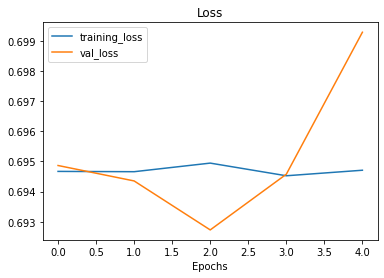

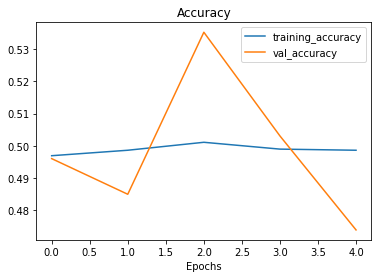

In [ ]:
# Plotting the loss curves 
plot_loss_curves(history_feature_model_1)

In [ ]:
# Gotta unfreeze all the layers 
base_model.trainable = True

# Refreeze all layers except last 5 
for layer in base_model.layers[:-5]:
  layer.trainable = False

# Compiling the model again making the change 
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam(lr = 0.001/ 10) , 
                metrics = ['accuracy' , f1_score]) 

In [ ]:
# Check what layers are trainable and what not? 
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)


In [ ]:
# Re-fit to fine tune the model 
initial_epochs = 5
fine_tune_epochs = initial_epochs + 5
history_fine_model_1 = model_1.fit(train_data , 
                                   epochs = fine_tune_epochs , 
                                   initial_epoch = history_feature_model_1.epoch[-1] , 
                                   validation_data = val_data , 
                                   validation_steps = len(val_data))

Epoch 5/10
1250/1250 [==============================] - 113s 87ms/step - loss: 0.6961 - accuracy: 0.5044 - f1_score: 0.6703 - val_loss: 0.7018 - val_accuracy: 0.4893 - val_f1_score: 0.6762
Epoch 6/10
1250/1250 [==============================] - 106s 85ms/step - loss: 0.6948 - accuracy: 0.4991 - f1_score: 0.6639 - val_loss: 0.6966 - val_accuracy: 0.5107 - val_f1_score: 0.6762
Epoch 7/10
1250/1250 [==============================] - 104s 83ms/step - loss: 0.6944 - accuracy: 0.5041 - f1_score: 0.6692 - val_loss: 0.6931 - val_accuracy: 0.5107 - val_f1_score: 0.6762
Epoch 8/10
1250/1250 [==============================] - 104s 83ms/step - loss: 0.6939 - accuracy: 0.5047 - f1_score: 0.6695 - val_loss: 0.6929 - val_accuracy: 0.5107 - val_f1_score: 0.6762
Epoch 9/10
1250/1250 [==============================] - 103s 83ms/step - loss: 0.6940 - accuracy: 0.5006 - f1_score: 0.6692 - val_loss: 0.6940 - val_accuracy: 0.4893 - val_f1_score: 0.6762
Epoch 10/10
1250/1250 [==============================] 

Hmm.. worse results. At one point of time our model stopped learning and got worse from there on.

Gotta get our good friend `LearningRateScheduler` now to choose learning rate.


### Model 2 : Same as before but adding two things, 
- LearningRateScheduler 
- Mixed Precision 

In [72]:
# Getting mixed_precision 
from tensorflow.keras import mixed_precision

# Turning on mixed_precision training 
mixed_precision.set_global_policy('mixed_float16')

In [73]:
# Creating our step decay learning rate scheduler 
from tensorflow.keras.callbacks import LearningRateScheduler
import math
initial_lr = 0.001
def lr_step_decay(epoch , lr):
  drop_rate = 0.5 
  epochs_drop = 1.0
  return initial_lr * math.pow(drop_rate , math.floor(epoch / epochs_drop))

initial_learning_rate = 0.01
def lr_exp_decay(epoch, lr):
    k = 0.1
    return initial_learning_rate * math.exp(-k*epoch)


checkpoint_path_model_2 = 'checkpoints/model_2'
checkpoint_model_2_path = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_model_2 , 
                                                                 monitor = 'val_accuracy' , 
                                                                 save_best_only = True , 
                                                                 save_weights_only = True , 
                                                                 verbose = 1)

In [65]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4* 10**(epoch/20))

In [74]:
# Create input shapes 
input_shape = (224 , 224, 3)

# Creating the base model at first (EfficientNetB0)
base_model = tf.keras.applications.EfficientNetB0(include_top= False)
base_model.trainable = False # Freezing all the layers 

# Creating our input layer 
inputs = tf.keras.layers.Input(shape= input_shape , name = 'input_layer_1')
x = base_model(inputs , training = False) # set base model to inference only 

# Layer to condense the tensors out from base model 
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# Output layer 
outputs = tf.keras.layers.Dense(1 , activation='sigmoid' , name = 'output_layer')(x)
# Packing into a model 
model_2 = tf.keras.Model(inputs , outputs)

# Getting the whole summary
model_2.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer_1 (InputLayer)   [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 1281      
Total params: 4,050,852
Trainable params: 1,281
Non-trainable params: 4,049,571
_________________________________________________________________


In [75]:
# Compiling the model 
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.RMSprop() , 
                metrics = ['accuracy' , f1_score])

In [76]:
history_feature_model_2 = model_2.fit(train_data , 
                                      validation_data = val_data , 
                                      epochs = 5 , 
                                      validation_steps = int(0.20 *(len(val_data))) , 
                                      callbacks = [checkpoint_model_2_path])

Epoch 1/5
1250/1250 [==============================] - 92s 70ms/step - loss: 0.6944 - accuracy: 0.5041 - f1_score: 0.6677 - val_loss: 0.6933 - val_accuracy: 0.5025 - val_f1_score: 0.6644

Epoch 00001: val_accuracy improved from -inf to 0.50250, saving model to checkpoints/model_2
Epoch 2/5
1250/1250 [==============================] - 86s 69ms/step - loss: 0.6949 - accuracy: 0.5002 - f1_score: 0.6678 - val_loss: 0.6937 - val_accuracy: 0.5013 - val_f1_score: 0.6656

Epoch 00002: val_accuracy did not improve from 0.50250
Epoch 3/5
1250/1250 [==============================] - 86s 69ms/step - loss: 0.6948 - accuracy: 0.4983 - f1_score: 0.6677 - val_loss: 0.6932 - val_accuracy: 0.4938 - val_f1_score: 0.6722

Epoch 00003: val_accuracy did not improve from 0.50250
Epoch 4/5
1250/1250 [==============================] - 86s 69ms/step - loss: 0.6949 - accuracy: 0.5014 - f1_score: 0.6664 - val_loss: 0.7008 - val_accuracy: 0.4762 - val_f1_score: 0.6874

Epoch 00004: val_accuracy did not improve fro

In [78]:
# Gotta unfreeze all the layers 
base_lr = 0.001
base_model.trainable = True

# Refreeze all layers except last 5 
for layer in base_model.layers[:-5]:
  layer.trainable = False

# Compiling the model again making the change 
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.RMSprop(lr = base_lr / 10) , 
                metrics = ['accuracy' , f1_score]) 

In [79]:
# Re-fit to fine - tune model 
initial_epochs = 5
fine_tune_epochs = initial_epochs + 5
history_fine_model_2 = model_2.fit(train_data , 
                                   epochs = fine_tune_epochs , 
                                   initial_epoch = history_feature_model_2.epoch[-1] , 
                                   validation_data = val_data , 
                                   validation_steps = int(0.25 * len(val_data)))

Epoch 5/10
1250/1250 [==============================] - 94s 71ms/step - loss: 0.6980 - accuracy: 0.5009 - f1_score: 0.6699 - val_loss: 0.6927 - val_accuracy: 0.5151 - val_f1_score: 0.6800
Epoch 6/10
1250/1250 [==============================] - 88s 70ms/step - loss: 0.6949 - accuracy: 0.5064 - f1_score: 0.6710 - val_loss: 0.6927 - val_accuracy: 0.5192 - val_f1_score: 0.6835
Epoch 7/10
1250/1250 [==============================] - 88s 71ms/step - loss: 0.6945 - accuracy: 0.5024 - f1_score: 0.6637 - val_loss: 0.6932 - val_accuracy: 0.5131 - val_f1_score: 0.6782
Epoch 8/10
1250/1250 [==============================] - 88s 70ms/step - loss: 0.6945 - accuracy: 0.4933 - f1_score: 0.6657 - val_loss: 0.6938 - val_accuracy: 0.4788 - val_f1_score: 0.6852
Epoch 9/10
1250/1250 [==============================] - 88s 70ms/step - loss: 0.6942 - accuracy: 0.4956 - f1_score: 0.6675 - val_loss: 0.6935 - val_accuracy: 0.4950 - val_f1_score: 0.6622
Epoch 10/10
1250/1250 [==============================] - 88s

In [60]:
def plot_lr(history):
    learning_rate = history.history['lr']
    epochs = range(1, len(learning_rate) + 1)
    plt.plot(epochs, learning_rate)
    plt.title('Learning rate')
    plt.xlabel('Epochs')
    plt.ylabel('Learning rate')
    plt.show()

In [62]:
plot_lr(history_fine_model_2)

KeyError: ignored

That's it for today, tried 2 things with different patterns it doesn't work. Will get over this again soon. 